## Классические алгоритмы без ансамблирования
В этом ноутбуке вам нужно обучить модели на датасете классификации из предыдущего ноутбука и сравнить результаты. Вам будет предоставлен baseline, на основе которого вы будете доделывать предсказывающие модели. Оценка лабы будет зависеть от ROC-AUC на тестовых данных по следующим критериям:
\
AUC - на тестовых данных
- $AUC \leq 0.75$ - 0 баллов
- $0.75 < AUC \leq 0.76$ - 2 балла
- $0.76 < AUC \leq 0.77$ - 4 балла
- $0.77 < AUC \leq 0.78$ - 6 баллов
- $0.78 < AUC \leq 0.79$ - 8 баллов
- $AUC > 0.79$ - 10 баллов

\
В этой работе запрещено использовать ансамбли моделей (лес, бустинги и т.д.)!

In [241]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import roc_auc_score, precision_score, recall_score, roc_curve, accuracy_score

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [242]:
data = pd.read_csv('german.csv', sep=';')

X = data.iloc[:, 1:]
y = data.iloc[:, 0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
data.head()

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Purpose,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,...,Duration_in_Current_address,Most_valuable_available_asset,Age_years,Concurrent_Credits,Type_of_apartment,No_of_Credits_at_this_Bank,Occupation,No_of_dependents,Telephone,Foreign_Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2


In [243]:
data = data.drop(columns = ['No_of_Credits_at_this_Bank', 'Telephone', 'Guarantors', 'Type_of_apartment', 'No_of_dependents', 'Duration_in_Current_address', 'Purpose', 'Occupation'])
data

,Creditability,Account_Balance,Duration_of_Credit_monthly,Payment_Status_of_Previous_Credit,Credit_Amount,Value_Savings_Stocks,Length_of_current_employment,Instalment_per_cent,Sex_Marital_Status,Most_valuable_available_asset,Age_years,Concurrent_Credits,Foreign_Worker
0,1,1,18,4,1049,1,2,4,2,2,21,3,1
1,1,1,9,4,2799,1,3,2,3,1,36,3,1
2,1,2,12,2,841,2,4,2,2,1,23,3,1
3,1,1,12,4,2122,1,3,3,3,1,39,3,2
4,1,1,12,4,2171,1,3,4,3,2,38,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,1987,1,3,2,3,1,21,3,1
996,0,1,24,2,2303,1,5,4,3,1,45,3,1
997,0,4,21,4,12680,5,5,4,3,4,30,3,1
998,0,2,12,2,6468,5,1,2,3,4,52,3,1


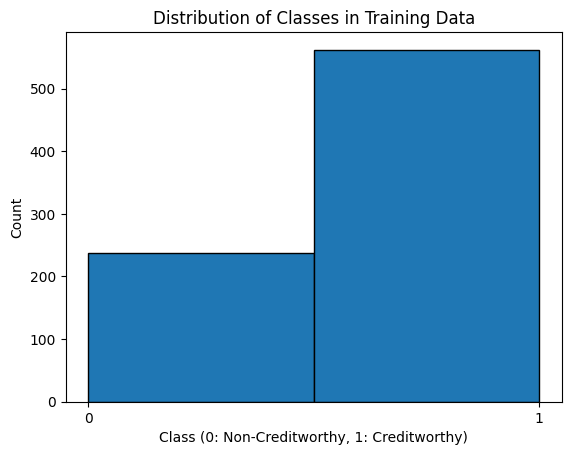

In [244]:
plt.hist(y_train, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

In [245]:
# Создание и обучение модели Logistic Regression
logistic_regression_model = LogisticRegression(
    penalty='l2',          # тип регуляризации
    C=1.0,                # сила регуляризации
    solver='lbfgs',       # алгоритм оптимизации
    max_iter=5000,        # максимальное количество итераций
    random_state=42,       # для воспроизводимости результатов
    class_weight='balanced'  # Учитываем дисбаланс классов
)
logistic_regression_model.fit(X_train, y_train)

# Создание и обучение модели Decision Tree
decision_tree_model = DecisionTreeClassifier(
    max_depth=5,          # максимальная глубина дерева
    min_samples_split=2,  # минимальное количество образцов для разделения узла
    min_samples_leaf=1,   # минимальное количество образцов в листе
    random_state=42       # для воспроизводимости результатов
)
decision_tree_model.fit(X_train, y_train)

# Создание и обучение модели K-Nearest Neighbors
knn_model = KNeighborsClassifier(
    n_neighbors=5,        # количество соседей
    weights='uniform',    # весовая функция unifor
    algorithm='auto',     # алгоритм вычисления ближайших соседей
    p=2                   # степень метрики Минковского (2 = евклидово расстояние)
)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [246]:
y_prob_logistic = logistic_regression_model.predict_proba(X_test)[:, 1]
y_prob_decision_tree = decision_tree_model.predict_proba(X_test)[:, 1]
y_prob_knn = knn_model.predict_proba(X_test)[:, 1]

y_pred_logistic = logistic_regression_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_knn = knn_model.predict(X_test)

accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

roc_auc_logistic = roc_auc_score(y_test, y_prob_logistic)
roc_auc_decision_tree = roc_auc_score(y_test, y_prob_decision_tree)
roc_auc_knn = roc_auc_score(y_test, y_prob_knn)

precision_logistic = precision_score(y_test, y_pred_logistic)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
precision_knn = precision_score(y_test, y_pred_knn)

recall_logistic = recall_score(y_test, y_pred_logistic)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
recall_knn = recall_score(y_test, y_pred_knn)
print(f'ROC AUC of Logistic Regression: {roc_auc_logistic}')
print(f'ROC AUC of Decision Tree: {roc_auc_decision_tree}')
print(f'ROC AUC of K-Nearest Neighbors: {roc_auc_knn}')

print('\n')

print(f'Accuracy of Logistic Regression: {accuracy_logistic}')
print(f'Accuracy of Decision Tree: {accuracy_decision_tree}')
print(f'Accuracy of K-Nearest Neighbors: {accuracy_knn}')

print(f'Precision of Logistic Regression: {precision_logistic}')
print(f'Precision of Decision Tree: {precision_decision_tree}')
print(f'Precision of K-Nearest Neighbors: {precision_knn}')

print(f'Recall of Logistic Regression: {recall_logistic}')
print(f'Recall of Decision Tree: {recall_decision_tree}')
print(f'Recall of K-Nearest Neighbors: {recall_knn}')

ROC AUC of Logistic Regression: 0.791374474053296
ROC AUC of Decision Tree: 0.7005610098176718
ROC AUC of K-Nearest Neighbors: 0.5781907433380085


Accuracy of Logistic Regression: 0.77
Accuracy of Decision Tree: 0.705
Accuracy of K-Nearest Neighbors: 0.66
Precision of Logistic Regression: 0.8833333333333333
Precision of Decision Tree: 0.7365269461077845
Precision of K-Nearest Neighbors: 0.7011494252873564
Recall of Logistic Regression: 0.7681159420289855
Recall of Decision Tree: 0.8913043478260869
Recall of K-Nearest Neighbors: 0.8840579710144928


## Экспериментируйте
Для получения лучшего качества придется поэкспериментировать. Подсказка: попробуйте оптимизировать гиперпараметры модели

In [247]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

можем заметить, что для логистической регрессии условие уже выполнено. Так что будем улучшать две другие модели

In [253]:
import pandas as pd

# Предположим, у вас есть X_train (признаки) и y_train (целевая переменная)
# Объединяем X_train и y_train в один DataFrame для удобства

# Имя столбца целевой переменной (замените 'target' на имя вашей переменной)
target_name = 'Creditability'

# Вычисляем корреляции
correlation_with_target = data.corr()[target_name].sort_values(ascending=False)

# Удаляем саму целевую переменную из списка
correlation_with_target = correlation_with_target.drop(index=target_name)

# Предположим, у вас есть DataFrame "correlation_with_target", полученный ранее
# Преобразуем Series в DataFrame для удобства отображения
correlation_table = correlation_with_target.reset_index()
correlation_table.columns = ['Feature', 'Correlation']

# Применяем подсветку градиентом
styled_table = correlation_table.style.background_gradient(cmap='coolwarm', subset=['Correlation'])

# Выводим таблицу
styled_table

,Feature,Correlation
0,Account_Balance,0.350847
1,Payment_Status_of_Previous_Credit,0.228785
2,Value_Savings_Stocks,0.178943
3,Length_of_current_employment,0.116002
4,Concurrent_Credits,0.109844
5,Age_years,0.091272
6,Sex_Marital_Status,0.088184
7,Foreign_Worker,0.082079
8,Instalment_per_cent,-0.072404
9,Most_valuable_available_asset,-0.142612


Я решил удалить самые менее значимые признаки

'No_of_Credits_at_this_Bank', 'Telephone', 'Guarantors', 'Type_of_apartment', 'No_of_dependents', 'Duration_in_Current_address', 'Purpose', 'Occupation'

In [255]:
numeric_features = ['Duration_of_Credit_monthly', 'Credit_Amount', 'Instalment_per_cent',
                   'Age_years']

categorical_features = ['Account_Balance', 'Payment_Status_of_Previous_Credit',
                      'Value_Savings_Stocks', 'Length_of_current_employment', 'Sex_Marital_Status',
                      'Most_valuable_available_asset', 'Concurrent_Credits',
                      'Foreign_Worker']

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('scaler', StandardScaler()),
            ('poly', poly)
        ]), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

Восстановим баланс классов

In [250]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

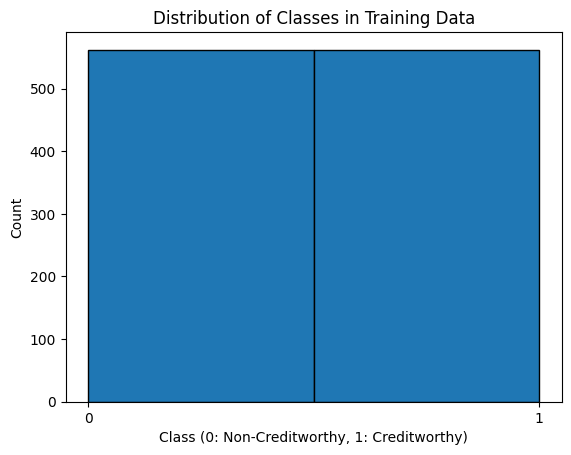

In [251]:
plt.hist(y_resampled, bins=2, edgecolor='k')
plt.xticks([0, 1])
plt.xlabel('Class (0: Non-Creditworthy, 1: Creditworthy)')
plt.ylabel('Count')
plt.title('Distribution of Classes in Training Data')
plt.show()

Обучение и использование моделей

In [252]:
#Decision Tree
dt_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', DecisionTreeClassifier(class_weight='balanced'))
])

dt_params = {
    'classifier__max_depth': [None, 10, 15, 20],  # Увеличиваем максимальную глубину
    'classifier__min_samples_split': [2, 5, 10, 20],  # Более строгие параметры
    'classifier__min_samples_leaf': [1, 2, 4, 8],
    'classifier__max_features': ['sqrt', 'log2', None],  # Добавляем варианты выбора признаков
    'classifier__ccp_alpha': [0, 0.01, 0.1]  # Параметр обрезки
}

# KNN
from sklearn.preprocessing import RobustScaler

knn_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('num', RobustScaler(), numeric_features),  # Более устойчивое масштабирование
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])),
    ('classifier', KNeighborsClassifier())
])

knn_params = {
    'classifier__n_neighbors': [5, 7, 10, 15, 20, 25, 30],
    'classifier__weights': ['uniform', 'distance'],
    'classifier__p': [1, 2],
    'classifier__algorithm': ['ball_tree', 'kd_tree', 'auto']
}

# Обучение и оценка моделей
best_score = 0
best_model = None

for name, pipeline, params in [('Decision Tree', dt_pipeline, dt_params),
                              ('KNN', knn_pipeline, knn_params)]:

    grid_search = GridSearchCV(pipeline, params, cv=5, scoring='roc_auc', n_jobs=-1)
    grid_search.fit(X_resampled, y_resampled)

    y_pred_proba = grid_search.predict_proba(X_test)[:, 1]
    auc_score = roc_auc_score(y_test, y_pred_proba)

    print(f"{name}:")
    print(f"Best params: {grid_search.best_params_}")
    print(f"Test AUC: {auc_score:.4f}")
    print("-" * 50)

    if auc_score > best_score:
        best_score = auc_score
        best_model = grid_search.best_estimator_

# Вывод лучшего результата
print("\n" + "=" * 50)
print(f"Best model: {type(best_model.named_steps['classifier']).__name__}")
print(f"Best AUC: {best_score:.4f}")

# Определение оценки
if best_score <= 0.75:
    grade = 0
elif 0.75 < best_score <= 0.76:
    grade = 2
elif 0.76 < best_score <= 0.77:
    grade = 4
elif 0.77 < best_score <= 0.78:
    grade = 6
elif 0.78 < best_score <= 0.79:
    grade = 8
else:
    grade = 10

print(f"Your grade: {grade}/10")

Decision Tree:
Best params: {'classifier__ccp_alpha': 0, 'classifier__max_depth': None, 'classifier__max_features': 'log2', 'classifier__min_samples_leaf': 8, 'classifier__min_samples_split': 2}
Test AUC: 0.7188
--------------------------------------------------
KNN:
Best params: {'classifier__algorithm': 'ball_tree', 'classifier__n_neighbors': 25, 'classifier__p': 1, 'classifier__weights': 'distance'}
Test AUC: 0.7522
--------------------------------------------------

Best model: KNeighborsClassifier
Best AUC: 0.7522
Your grade: 2/10


Несмотря на то, что не получились метрики, на которые мы рассчитывали, можно сказать, что нам удалось улучшить модель, ведь показатели auc умножились на 0.018 и 0.18. К тому же, у нас есть линейная регрессия, которая уже достигает цели